In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
# Try likely locations relative to the notebook
candidates = [Path("results/tables"), Path("../results/tables"), Path("../../results/tables")]

csv_path = None
for d in candidates:
    if d.exists():
        matches = sorted(d.glob("gaussian_*.csv"))
        if matches:
            csv_path = matches[-1]  # newest by name
            break

if csv_path is None:
    raise FileNotFoundError(
        "No CSVs matched 'gaussian_*.csv'. "
        "Run the simulations first: `python -m scripts.run_sim_gaussian` from the repo root, "
        "then re-run this cell."
    )

print("Using:", csv_path.resolve())
df = pd.read_csv(csv_path)
df.head(3)

Using: C:\Users\hirshikesh\Desktop\lct-corr-replication\results\tables\gaussian_p500_n80_80_rho0.25_b20_R50.csv


,p,n1,n2,rho,block,seed,R_bh_0.05,V_bh_0.05,S_bh_0.05,R_by_0.05,...,V_bh_0.1,S_bh_0.1,R_by_0.1,V_by_0.1,S_by_0.1,fdr_bh_0.1,power_bh_0.1,fdr_by_0.1,power_by_0.1,wall_time_s
0,500,80,80,0.25,20,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.084391
1,500,80,80,0.25,20,1,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.081524
2,500,80,80,0.25,20,2,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.082464


In [2]:
# aggregate means
summary = df.mean(numeric_only=True)
m = {
    "BH FDR@0.05": summary["fdr_bh_0.05"],
    "BH Power@0.05": summary["power_bh_0.05"],
    "BY FDR@0.05": summary["fdr_by_0.05"],
    "BY Power@0.05": summary["power_by_0.05"],
}

m

{'BH FDR@0.05': np.float64(0.02),
 'BH Power@0.05': np.float64(0.0),
 'BY FDR@0.05': np.float64(0.0),
 'BY Power@0.05': np.float64(0.0)}

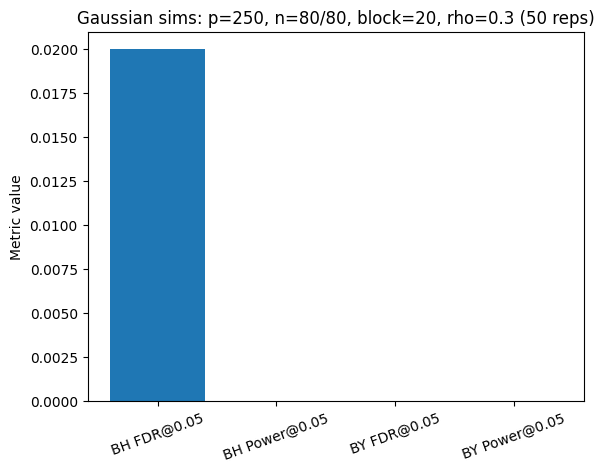

In [3]:
# Bar plot
labels = list(m.keys()); vals = [m[k] for k in labels]
plt.bar(labels, vals)
plt.xticks(rotation=20)
plt.title("Gaussian sims: p=250, n=80/80, block=20, rho=0.3 (50 reps)")
plt.ylabel("Metric value")
plt.show()

In [4]:
# 1) Locate the repo root (folder that has "results/tables")
CANDIDATES = [Path.cwd(), *Path.cwd().parents]
ROOT = None
for d in CANDIDATES:
    if (d / "results" / "tables").exists():
        ROOT = d
        break
assert ROOT is not None, "Couldn't find results/tables. Run the sim script first."

TABLES = ROOT / "results" / "tables"
FIGDIR = ROOT / "results" / "figures"
FIGDIR.mkdir(parents=True, exist_ok=True)

In [5]:
def latest_csv(prefix: str) -> Path:
    files = sorted(TABLES.glob(f"{prefix}*.csv"))
    if not files:
        raise FileNotFoundError(f"No CSVs matching '{prefix}*.csv' in {TABLES}")
    return files[-1]

def plot_and_save(df: pd.DataFrame, title: str, outname: str):
    s = df.mean(numeric_only=True)
    labels = ["BH FDR@0.05","BH Power@0.05","BY FDR@0.05","BY Power@0.05"]
    vals = [s["fdr_bh_0.05"], s["power_bh_0.05"], s["fdr_by_0.05"], s["power_by_0.05"]]
    plt.figure()
    plt.bar(labels, vals)
    plt.xticks(rotation=20)
    plt.ylabel("Metric value")
    plt.title(title)
    out = FIGDIR / outname
    plt.savefig(out, dpi=200, bbox_inches="tight")
    plt.show()
    print("Saved:", out)

Using: C:\Users\hirshikesh\Desktop\lct-corr-replication\results\tables\gaussian_p250_n80_80_rho0.3_b20_R50.csv


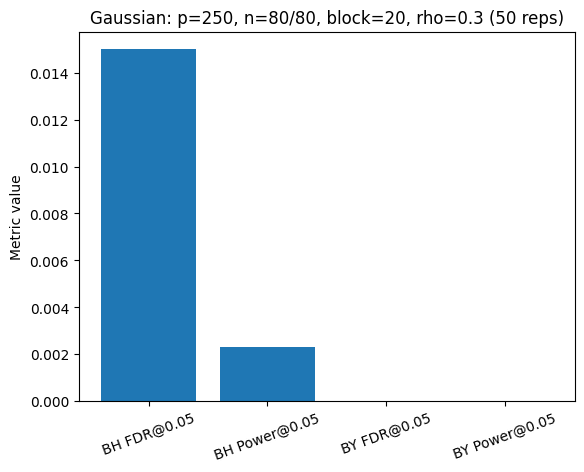

Saved: C:\Users\hirshikesh\Desktop\lct-corr-replication\results\figures\gaussian_p250_n80_80_rho0.3_b20_R50.png
Using: C:\Users\hirshikesh\Desktop\lct-corr-replication\results\tables\gaussian_p500_n80_80_rho0.25_b20_R50.csv


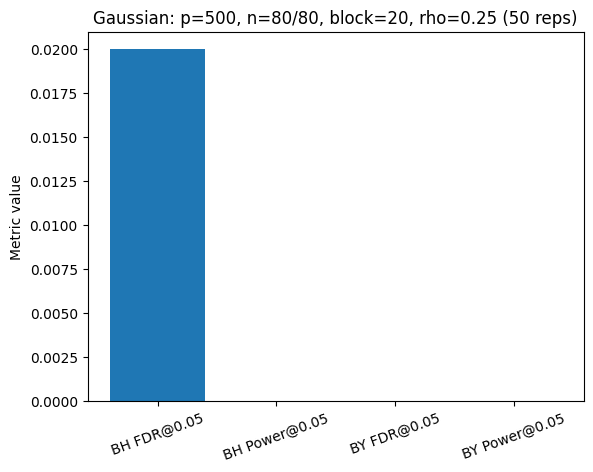

Saved: C:\Users\hirshikesh\Desktop\lct-corr-replication\results\figures\gaussian_p500_n80_80_rho0.25_b20_R50.png


In [6]:
# 2) Load and plot p=250
csv250 = latest_csv("gaussian_p250_")
df250 = pd.read_csv(csv250)
print("Using:", csv250)
plot_and_save(
    df250,
    "Gaussian: p=250, n=80/80, block=20, rho=0.3 (50 reps)",
    "gaussian_p250_n80_80_rho0.3_b20_R50.png"
)

# 3) Load and plot p=500
csv500 = latest_csv("gaussian_p500_")
df500 = pd.read_csv(csv500)
print("Using:", csv500)
plot_and_save(
    df500,
    "Gaussian: p=500, n=80/80, block=20, rho=0.25 (50 reps)",
    "gaussian_p500_n80_80_rho0.25_b20_R50.png"
)